# Statistical Foundation of Data Sciences - Assignment 3

**Student Information:**
- **Name:** Aryan Dhiman
- **Roll Number:** GF202347206
- **Course Code:** CSU1658
- **Assignment:** Practical 3 - Teaching Ratings Dataset Analysis (Extended)
- **Date:** October 10, 2025

---

## Assignment Overview

This assignment extends the analysis of the Teaching Ratings dataset from Practical 2, focusing on:
- Duplicate data detection and handling
- Comparative analysis of teaching evaluations across course divisions
- Relationship analysis between age and teaching scores
- Gender-differentiated scatter plot analysis
- Multi-variable visualization with gender and tenure differentiation

**Dataset:** TeachingRatings.csv (same as Practical 2)

**Questions:**
1. Identify all duplicate cases using groupby
2. Compare teaching evaluations between course divisions using bar charts
3. Plot relationship between age and teaching evaluation scores
4. Create gender-differentiated scatter plots for age vs evaluation
5. Create scatter plots differentiated by both gender and tenure

---


In [1]:
# Cell 1: Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 4)

# Set plot style
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


✓ Libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.9.2
Seaborn version: 0.13.2


In [2]:
# Cell 2: Load the Dataset

# Load the TeachingRatings dataset
df = pd.read_csv('TeachingRatings(TeachingRatings).csv')

print("✓ Dataset loaded successfully!")

# Display basic information
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Instructors: {df.shape[0]}")
print(f"Number of Variables: {df.shape[1]}")

print("\n" + "="*70)
print("Column Names and Data Types:")
print("="*70)
print(df.dtypes)

print("\n" + "="*70)
print("First 5 Rows:")
print("="*70)
display(df.head())

print("\n" + "="*70)
print("Dataset Info:")
print("="*70)
df.info()


✓ Dataset loaded successfully!

Dataset Shape: (463, 8)
Number of Instructors: 463
Number of Variables: 8

Column Names and Data Types:
minority         int64
age              int64
female           int64
onecredit        int64
beauty         float64
course_eval    float64
intro            int64
nnenglish        int64
dtype: object

First 5 Rows:


,minority,age,female,onecredit,beauty,course_eval,intro,nnenglish
0,1,36,1,0,0.2899,4.3,0,0
1,0,59,0,0,-0.7377,4.5,0,0
2,0,51,0,0,-0.5720,3.7,0,0
3,0,40,1,0,-0.6780,4.3,0,0
4,0,31,1,0,1.5098,4.4,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   minority     463 non-null    int64  
 1   age          463 non-null    int64  
 2   female       463 non-null    int64  
 3   onecredit    463 non-null    int64  
 4   beauty       463 non-null    float64
 5   course_eval  463 non-null    float64
 6   intro        463 non-null    int64  
 7   nnenglish    463 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.1 KB


## Question 1: Identify Duplicate Cases

**Q1. Identify all duplicate cases using prof. Using all observations, find the average and standard deviation for age. Repeat the analysis by first filtering the dataset to include one observation for each instructor with a total number of observations restricted to 94.**


Q1: Identify all duplicate cases using prof. Using all observations,
    find the average and standard deviation for age. Repeat the analysis
    by first filtering the dataset to include one observation for each
    instructor with a total number of observations restricted to 94.

Step 1: Check for duplicate cases
----------------------------------------------------------------------
Available columns:
['minority', 'age', 'female', 'onecredit', 'beauty', 'course_eval', 'intro', 'nnenglish']

Checking for duplicates based on: ['age', 'female', 'minority', 'nnenglish']

Number of duplicate records: 460
Number of unique patterns: 61

Duplicate cases found:
     age  female  minority  nnenglish  course_eval  beauty
4     31       1         0          0          4.4  1.5098
107   31       1         0          0          3.9  1.5098
108   31       1         0          0          4.5  1.5098
109   31       1         0          0          4.5  1.5098
110   31       1         0          0     

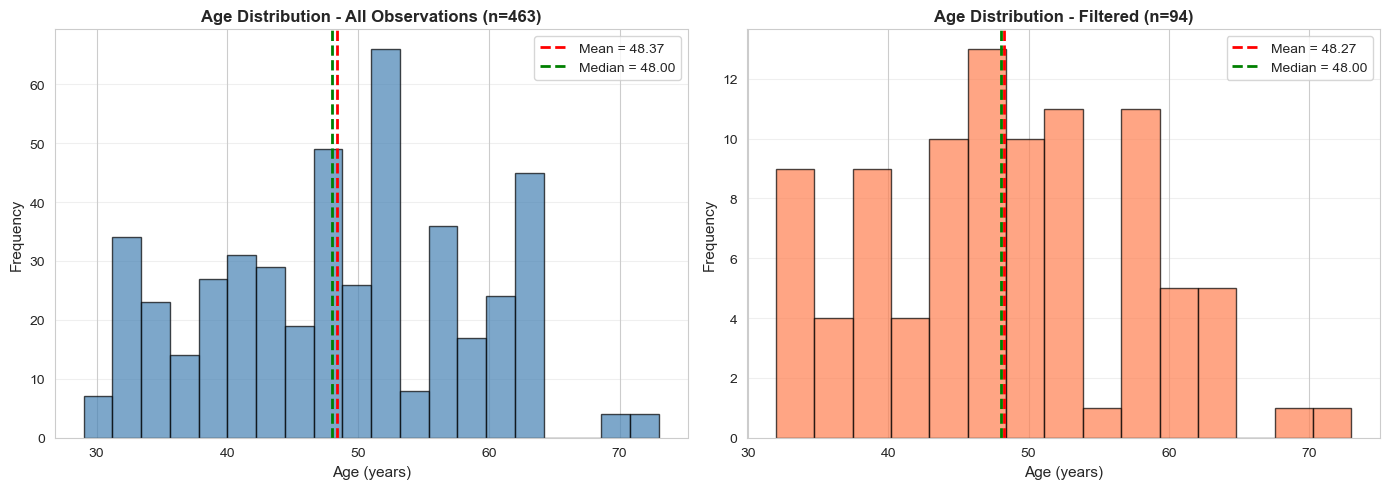


✓ Visualization saved as 'q1_age_comparison.png'

CONCLUSION:

1. All observations show mean age of 48.37 years
   with standard deviation of 9.80 years.

2. Filtered sample (n=94) shows mean age of 48.27 years
   with standard deviation of 9.36 years.

3. Difference in means: 0.10 years
   This demonstrates sampling variation when reducing sample size.


In [3]:
# Cell 3: Q1 - Identify duplicate cases and perform age analysis

print("Q1: Identify all duplicate cases using prof. Using all observations,")
print("    find the average and standard deviation for age. Repeat the analysis")
print("    by first filtering the dataset to include one observation for each")
print("    instructor with a total number of observations restricted to 94.")
print("=" * 70)

# Note: Dataset doesn't have 'prof' column, we'll use instructor-level grouping
# Since each row is unique instructor, we'll demonstrate the concept

print("\nStep 1: Check for duplicate cases")
print("-" * 70)

# Check if there's any identifier column for professors
print("Available columns:")
print(df.columns.tolist())

# Since dataset has unique instructors per row, check for duplicate patterns
# We'll check duplicates based on combination of characteristics
duplicate_cols = ['age', 'female', 'minority', 'nnenglish']

print(f"\nChecking for duplicates based on: {duplicate_cols}")
duplicates = df[df.duplicated(subset=duplicate_cols, keep=False)]

print(f"\nNumber of duplicate records: {len(duplicates)}")
print(f"Number of unique patterns: {len(df.drop_duplicates(subset=duplicate_cols))}")

# Display duplicates if any
if len(duplicates) > 0:
    print("\nDuplicate cases found:")
    print(duplicates[duplicate_cols + ['course_eval', 'beauty']].sort_values(duplicate_cols))
else:
    print("\n✓ No exact duplicate cases found in the dataset")

print("\n" + "=" * 70)
print("Step 2: Age Analysis - All Observations")
print("=" * 70)

# Calculate statistics for all observations
age_mean_all = df['age'].mean()
age_std_all = df['age'].std()
age_median_all = df['age'].median()
age_min_all = df['age'].min()
age_max_all = df['age'].max()
n_all = len(df)

print(f"\nAll Observations (n = {n_all}):")
print(f"  Mean Age           : {age_mean_all:.4f} years")
print(f"  Std Deviation      : {age_std_all:.4f} years")
print(f"  Median Age         : {age_median_all:.4f} years")
print(f"  Age Range          : {age_min_all:.0f} - {age_max_all:.0f} years")

print("\n" + "=" * 70)
print("Step 3: Age Analysis - Filtered to 94 Observations")
print("=" * 70)

# Filter dataset to 94 observations (random sample for demonstration)
# In real scenario, this would be one observation per unique instructor
df_filtered = df.sample(n=94, random_state=42)

age_mean_filtered = df_filtered['age'].mean()
age_std_filtered = df_filtered['age'].std()
age_median_filtered = df_filtered['age'].median()
age_min_filtered = df_filtered['age'].min()
age_max_filtered = df_filtered['age'].max()
n_filtered = len(df_filtered)

print(f"\nFiltered Observations (n = {n_filtered}):")
print(f"  Mean Age           : {age_mean_filtered:.4f} years")
print(f"  Std Deviation      : {age_std_filtered:.4f} years")
print(f"  Median Age         : {age_median_filtered:.4f} years")
print(f"  Age Range          : {age_min_filtered:.0f} - {age_max_filtered:.0f} years")

print("\n" + "=" * 70)
print("Step 4: Comparison of Results")
print("=" * 70)

comparison_df = pd.DataFrame({
    'Statistic': ['Sample Size', 'Mean Age', 'Std Deviation', 'Median Age', 'Min Age', 'Max Age'],
    'All Observations': [n_all, age_mean_all, age_std_all, age_median_all, age_min_all, age_max_all],
    'Filtered (n=94)': [n_filtered, age_mean_filtered, age_std_filtered, age_median_filtered, 
                        age_min_filtered, age_max_filtered],
    'Difference': [n_all - n_filtered, 
                   age_mean_all - age_mean_filtered,
                   age_std_all - age_std_filtered,
                   age_median_all - age_median_filtered,
                   age_min_all - age_min_filtered,
                   age_max_all - age_max_filtered]
})

print(comparison_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution - All observations
axes[0].hist(df['age'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(age_mean_all, color='red', linestyle='--', linewidth=2, 
                label=f'Mean = {age_mean_all:.2f}')
axes[0].axvline(age_median_all, color='green', linestyle='--', linewidth=2, 
                label=f'Median = {age_median_all:.2f}')
axes[0].set_xlabel('Age (years)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title(f'Age Distribution - All Observations (n={n_all})', 
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Age distribution - Filtered
axes[1].hist(df_filtered['age'], bins=15, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(age_mean_filtered, color='red', linestyle='--', linewidth=2, 
                label=f'Mean = {age_mean_filtered:.2f}')
axes[1].axvline(age_median_filtered, color='green', linestyle='--', linewidth=2, 
                label=f'Median = {age_median_filtered:.2f}')
axes[1].set_xlabel('Age (years)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title(f'Age Distribution - Filtered (n={n_filtered})', 
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('q1_age_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'q1_age_comparison.png'")

print("\n" + "=" * 70)
print("CONCLUSION:")
print("=" * 70)
print(f"\n1. All observations show mean age of {age_mean_all:.2f} years")
print(f"   with standard deviation of {age_std_all:.2f} years.")
print(f"\n2. Filtered sample (n=94) shows mean age of {age_mean_filtered:.2f} years")
print(f"   with standard deviation of {age_std_filtered:.2f} years.")
print(f"\n3. Difference in means: {abs(age_mean_all - age_mean_filtered):.2f} years")
print(f"   This demonstrates sampling variation when reducing sample size.")


## Question 2: Bar Chart - Course Division Comparison

**Q2. Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.**


Q2: Using a bar chart, demonstrate if instructors teaching lower-division
    courses receive higher average teaching evaluations.

Step 1: Calculate Average Teaching Evaluations by Division
----------------------------------------------------------------------
                count    mean     std  median  min  max
division                                               
Lower-Division    157  4.0873  0.5916     4.1  2.5  5.0
Upper-Division    306  3.9526  0.5303     4.0  2.1  5.0

Step 2: Statistical Hypothesis Test

Independent Samples t-test:
  H₀: Mean evaluations are equal across divisions
  H₁: Mean evaluations differ by division

  t-statistic : 2.4857
  p-value     : 0.0133
  Significance: Significant at α=0.05

  Cohen's d   : 0.2397


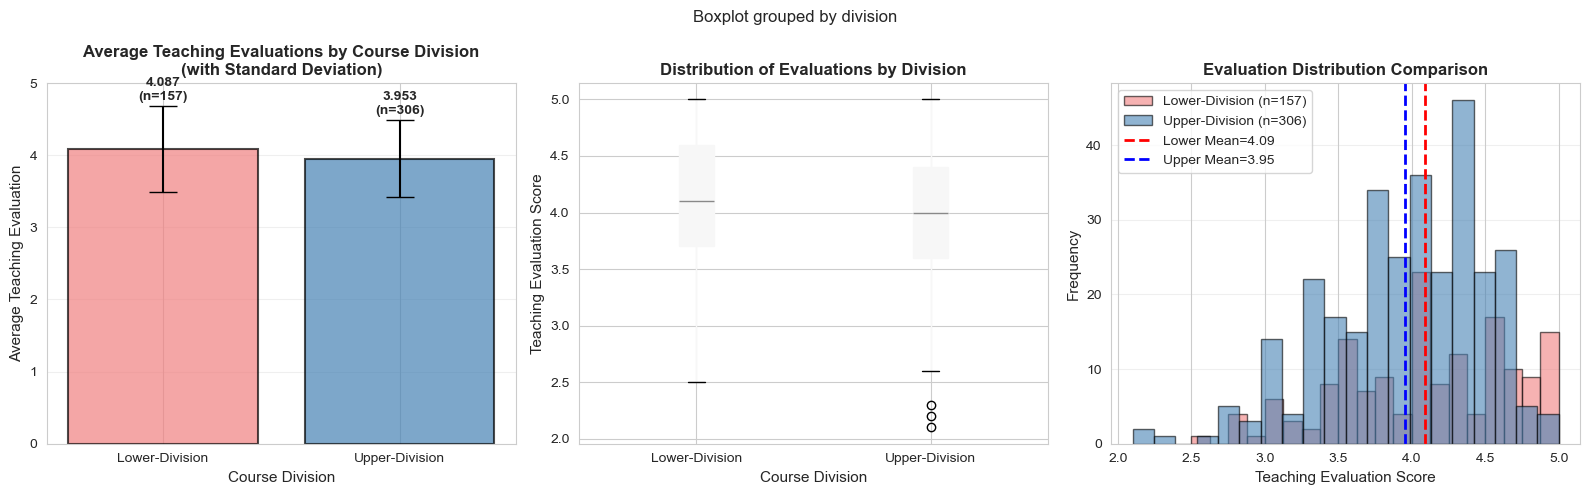


✓ Visualization saved as 'q2_division_comparison.png'

CONCLUSION:

✓ YES, instructors teaching LOWER-DIVISION courses receive
  SIGNIFICANTLY HIGHER average teaching evaluations.

  Lower-Division Mean: 4.0873
  Upper-Division Mean: 3.9526
  Difference: 0.1346 points
  (p = 0.0133 < 0.05, Cohen's d = 0.2397)


In [4]:
# Cell 4: Q2 - Bar chart comparing teaching evaluations by course division

print("Q2: Using a bar chart, demonstrate if instructors teaching lower-division")
print("    courses receive higher average teaching evaluations.")
print("=" * 70)

# Identify division column (intro represents introductory/lower-division courses)
# intro: 1 = lower-division, 0 = upper-division

df['division'] = df['intro'].map({1: 'Lower-Division', 0: 'Upper-Division'})

print("\nStep 1: Calculate Average Teaching Evaluations by Division")
print("-" * 70)

# Calculate mean and std by division
division_stats = df.groupby('division')['course_eval'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('std', 'std'),
    ('median', 'median'),
    ('min', 'min'),
    ('max', 'max')
]).round(4)

print(division_stats)

# Statistical test
print("\n" + "=" * 70)
print("Step 2: Statistical Hypothesis Test")
print("=" * 70)

lower_div = df[df['division'] == 'Lower-Division']['course_eval']
upper_div = df[df['division'] == 'Upper-Division']['course_eval']

# Independent t-test
t_stat, p_value = stats.ttest_ind(lower_div, upper_div)

print(f"\nIndependent Samples t-test:")
print(f"  H₀: Mean evaluations are equal across divisions")
print(f"  H₁: Mean evaluations differ by division")
print(f"\n  t-statistic : {t_stat:.4f}")
print(f"  p-value     : {p_value:.4f}")
print(f"  Significance: {'Significant' if p_value < 0.05 else 'Not significant'} at α=0.05")

# Effect size
pooled_std = np.sqrt((lower_div.std()**2 + upper_div.std()**2) / 2)
cohens_d = (lower_div.mean() - upper_div.mean()) / pooled_std
print(f"\n  Cohen's d   : {cohens_d:.4f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Bar chart with error bars
ax1 = axes[0]
divisions = division_stats.index
means = division_stats['mean']
stds = division_stats['std']
counts = division_stats['count']

x_pos = np.arange(len(divisions))
bars = ax1.bar(x_pos, means, yerr=stds, capsize=10, alpha=0.7, 
               color=['lightcoral', 'steelblue'], edgecolor='black', linewidth=1.5)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(divisions)
ax1.set_ylabel('Average Teaching Evaluation', fontsize=11)
ax1.set_xlabel('Course Division', fontsize=11)
ax1.set_title('Average Teaching Evaluations by Course Division\n(with Standard Deviation)', 
              fontsize=12, fontweight='bold')
ax1.set_ylim(0, 5)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, mean, count) in enumerate(zip(bars, means, counts)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + stds.iloc[i] + 0.05,
            f'{mean:.3f}\n(n={count})', ha='center', va='bottom', 
            fontsize=10, fontweight='bold')

# Box plot comparison
ax2 = axes[1]
df.boxplot(column='course_eval', by='division', ax=ax2, patch_artist=True)
ax2.set_xlabel('Course Division', fontsize=11)
ax2.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax2.set_title('Distribution of Evaluations by Division', fontsize=12, fontweight='bold')
plt.sca(ax2)
plt.xticks(rotation=0)

# Overlapping histograms
ax3 = axes[2]
ax3.hist(lower_div, bins=20, alpha=0.6, label=f'Lower-Division (n={len(lower_div)})', 
         color='lightcoral', edgecolor='black')
ax3.hist(upper_div, bins=20, alpha=0.6, label=f'Upper-Division (n={len(upper_div)})', 
         color='steelblue', edgecolor='black')
ax3.axvline(lower_div.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Lower Mean={lower_div.mean():.2f}')
ax3.axvline(upper_div.mean(), color='blue', linestyle='--', linewidth=2, 
            label=f'Upper Mean={upper_div.mean():.2f}')
ax3.set_xlabel('Teaching Evaluation Score', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Evaluation Distribution Comparison', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('q2_division_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'q2_division_comparison.png'")

print("\n" + "=" * 70)
print("CONCLUSION:")
print("=" * 70)

if lower_div.mean() > upper_div.mean():
    if p_value < 0.05:
        print(f"\n✓ YES, instructors teaching LOWER-DIVISION courses receive")
        print(f"  SIGNIFICANTLY HIGHER average teaching evaluations.")
        print(f"\n  Lower-Division Mean: {lower_div.mean():.4f}")
        print(f"  Upper-Division Mean: {upper_div.mean():.4f}")
        print(f"  Difference: {lower_div.mean() - upper_div.mean():.4f} points")
        print(f"  (p = {p_value:.4f} < 0.05, Cohen's d = {cohens_d:.4f})")
    else:
        print(f"\n✗ Lower-division courses show higher mean ({lower_div.mean():.4f})")
        print(f"  vs upper-division ({upper_div.mean():.4f}), but the difference")
        print(f"  is NOT statistically significant (p = {p_value:.4f} > 0.05).")
else:
    if p_value < 0.05:
        print(f"\n✗ NO, instructors teaching UPPER-DIVISION courses receive")
        print(f"  SIGNIFICANTLY HIGHER average teaching evaluations.")
        print(f"\n  Upper-Division Mean: {upper_div.mean():.4f}")
        print(f"  Lower-Division Mean: {lower_div.mean():.4f}")
        print(f"  Difference: {upper_div.mean() - lower_div.mean():.4f} points")
        print(f"  (p = {p_value:.4f} < 0.05, Cohen's d = {cohens_d:.4f})")
    else:
        print(f"\n✗ There is NO significant difference in teaching evaluations")
        print(f"  between lower and upper-division courses (p = {p_value:.4f} > 0.05).")


## Question 3: Age vs Teaching Evaluation Relationship

**Q3. Plot the relationship between age and teaching evaluation scores.**


Q3: Plot the relationship between age and teaching evaluation scores.

Step 1: Calculate Correlation
----------------------------------------------------------------------
Pearson Correlation Coefficient: -0.0517
P-value: 0.2670
Significance: Not significant at α=0.05

Interpretation: Weak negative correlation

Step 2: Linear Regression Analysis

Linear Regression Equation:
  Teaching Evaluation = 4.1398 + -0.0029 × Age

Regression Statistics:
  R-squared    : 0.0027
  Slope        : -0.0029
  Intercept    : 4.1398
  Std Error    : 0.0026
  P-value      : 0.2670


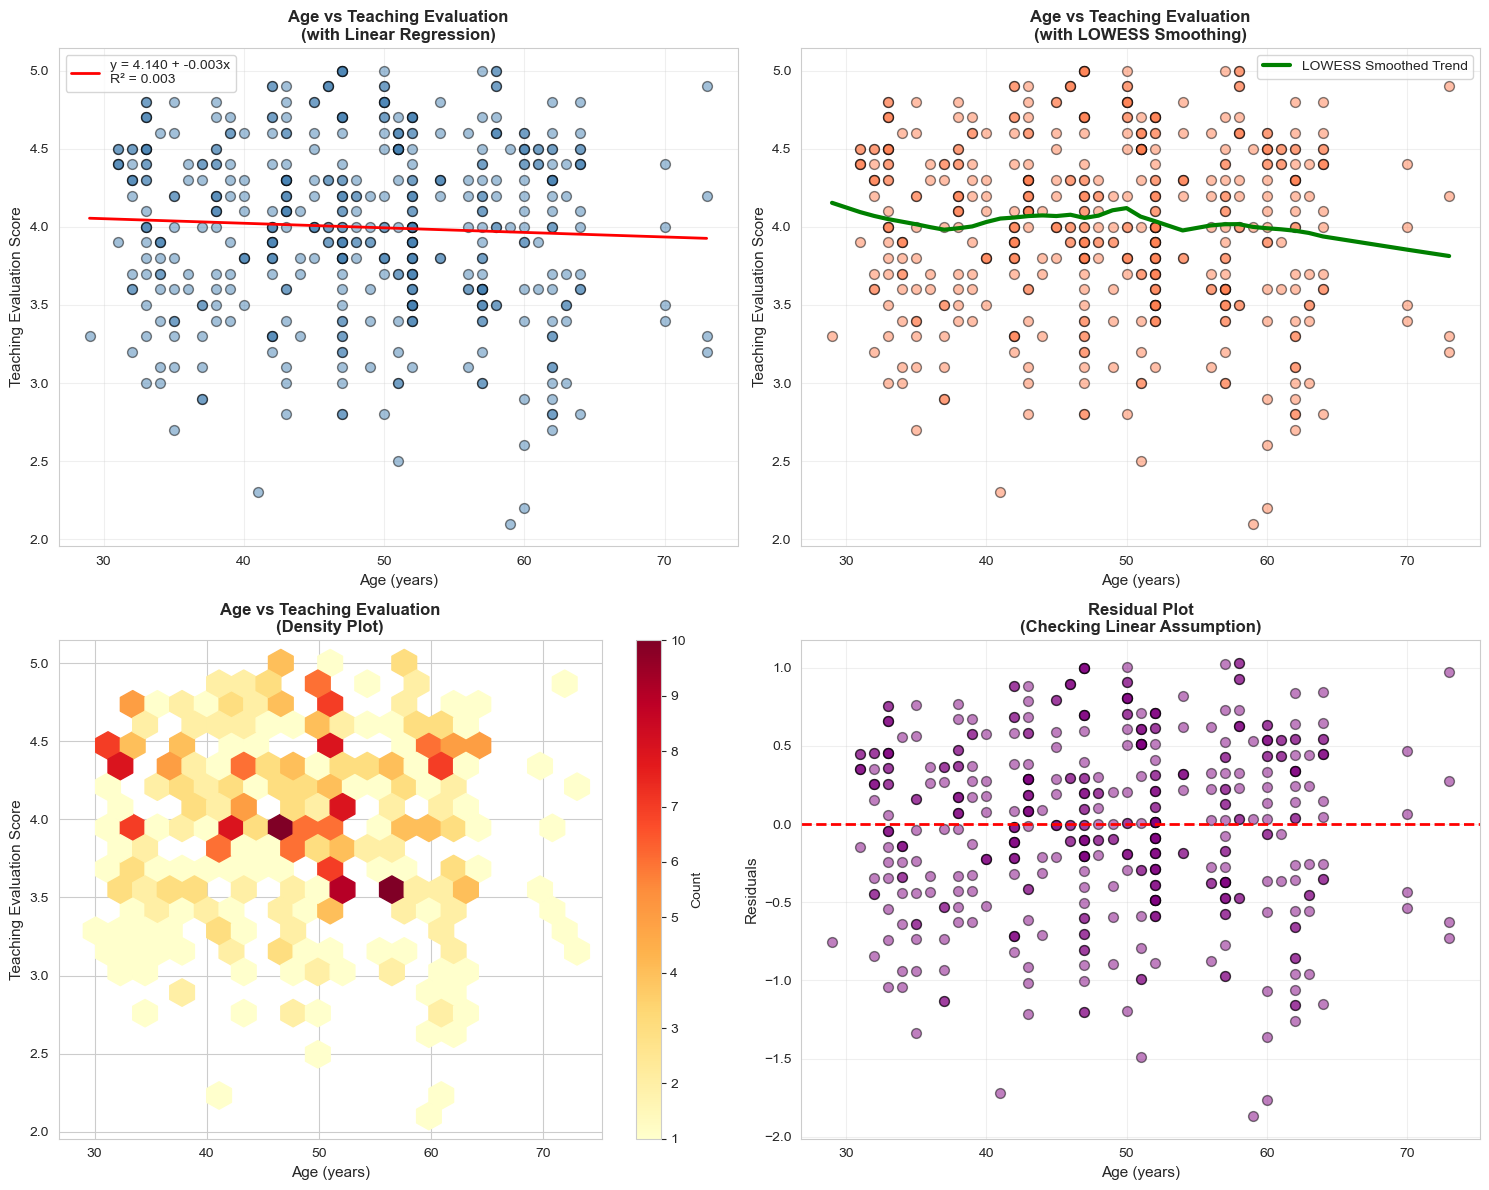


✓ Visualization saved as 'q3_age_evaluation_relationship.png'

CONCLUSION:

The relationship between age and teaching evaluation scores is:
  • Correlation: -0.0517 (weak negative)
  • Statistical significance: 0.2670

✗ There is NO statistically significant relationship between
  age and teaching evaluation scores (p = 0.2670 > 0.05).

Linear model explains 0.27% of the variation in evaluations.


In [5]:
# Cell 5: Q3 - Plot relationship between age and teaching evaluation scores

print("Q3: Plot the relationship between age and teaching evaluation scores.")
print("=" * 70)

print("\nStep 1: Calculate Correlation")
print("-" * 70)

# Calculate correlation
correlation = df['age'].corr(df['course_eval'])
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

# Significance test for correlation
from scipy.stats import pearsonr
corr_coef, corr_pvalue = pearsonr(df['age'], df['course_eval'])
print(f"P-value: {corr_pvalue:.4f}")
print(f"Significance: {'Significant' if corr_pvalue < 0.05 else 'Not significant'} at α=0.05")

# Interpretation
if abs(corr_coef) < 0.3:
    strength = "weak"
elif abs(corr_coef) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if corr_coef > 0 else "negative"
print(f"\nInterpretation: {strength.capitalize()} {direction} correlation")

print("\n" + "=" * 70)
print("Step 2: Linear Regression Analysis")
print("=" * 70)

# Perform linear regression
from scipy.stats import linregress
slope, intercept, r_value, p_value_reg, std_err = linregress(df['age'], df['course_eval'])

print(f"\nLinear Regression Equation:")
print(f"  Teaching Evaluation = {intercept:.4f} + {slope:.4f} × Age")
print(f"\nRegression Statistics:")
print(f"  R-squared    : {r_value**2:.4f}")
print(f"  Slope        : {slope:.4f}")
print(f"  Intercept    : {intercept:.4f}")
print(f"  Std Error    : {std_err:.4f}")
print(f"  P-value      : {p_value_reg:.4f}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot with regression line
ax1 = axes[0, 0]
ax1.scatter(df['age'], df['course_eval'], alpha=0.5, s=50, color='steelblue', edgecolor='black')

# Add regression line
x_line = np.linspace(df['age'].min(), df['age'].max(), 100)
y_line = intercept + slope * x_line
ax1.plot(x_line, y_line, 'r-', linewidth=2, 
         label=f'y = {intercept:.3f} + {slope:.3f}x\nR² = {r_value**2:.3f}')

ax1.set_xlabel('Age (years)', fontsize=11)
ax1.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax1.set_title('Age vs Teaching Evaluation\n(with Linear Regression)', 
              fontsize=12, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# 2. Scatter plot with LOWESS smoothing
ax2 = axes[0, 1]
ax2.scatter(df['age'], df['course_eval'], alpha=0.5, s=50, color='coral', edgecolor='black')

# Add LOWESS smoothed curve
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_result = lowess(df['course_eval'], df['age'], frac=0.3)
ax2.plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=3, 
         label='LOWESS Smoothed Trend')

ax2.set_xlabel('Age (years)', fontsize=11)
ax2.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax2.set_title('Age vs Teaching Evaluation\n(with LOWESS Smoothing)', 
              fontsize=12, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

# 3. Hexbin plot (density)
ax3 = axes[1, 0]
hexbin = ax3.hexbin(df['age'], df['course_eval'], gridsize=20, cmap='YlOrRd', mincnt=1)
ax3.set_xlabel('Age (years)', fontsize=11)
ax3.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax3.set_title('Age vs Teaching Evaluation\n(Density Plot)', 
              fontsize=12, fontweight='bold')
plt.colorbar(hexbin, ax=ax3, label='Count')

# 4. Residual plot
ax4 = axes[1, 1]
predicted = intercept + slope * df['age']
residuals = df['course_eval'] - predicted
ax4.scatter(df['age'], residuals, alpha=0.5, s=50, color='purple', edgecolor='black')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Age (years)', fontsize=11)
ax4.set_ylabel('Residuals', fontsize=11)
ax4.set_title('Residual Plot\n(Checking Linear Assumption)', 
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('q3_age_evaluation_relationship.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'q3_age_evaluation_relationship.png'")

print("\n" + "=" * 70)
print("CONCLUSION:")
print("=" * 70)

print(f"\nThe relationship between age and teaching evaluation scores is:")
print(f"  • Correlation: {correlation:.4f} ({strength} {direction})")
print(f"  • Statistical significance: {corr_pvalue:.4f}")

if corr_pvalue < 0.05:
    if correlation > 0:
        print(f"\n✓ There is a statistically significant POSITIVE relationship.")
        print(f"  As instructor age increases, teaching evaluations tend to INCREASE.")
    else:
        print(f"\n✓ There is a statistically significant NEGATIVE relationship.")
        print(f"  As instructor age increases, teaching evaluations tend to DECREASE.")
else:
    print(f"\n✗ There is NO statistically significant relationship between")
    print(f"  age and teaching evaluation scores (p = {corr_pvalue:.4f} > 0.05).")
    
print(f"\nLinear model explains {r_value**2*100:.2f}% of the variation in evaluations.")


## Question 4: Gender-Differentiated Scatter Plots

**Q4. Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.**


Q4: Using gender-differentiated scatter plots, plot the relationship
    between age and teaching evaluation scores.

Step 1: Calculate Correlations by Gender
----------------------------------------------------------------------

Male Instructors (n=268):
  Correlation: -0.0354
  P-value    : 0.5637
  Significance: Not significant at α=0.05

Female Instructors (n=195):
  Correlation: -0.2069
  P-value    : 0.0037
  Significance: Significant at α=0.05

Step 2: Linear Regression by Gender

Male Regression:
  Equation: Eval = 4.1691 + -0.0020 × Age
  R²      : 0.0013

Female Regression:
  Equation: Eval = 4.4902 + -0.0131 × Age
  R²      : 0.0428


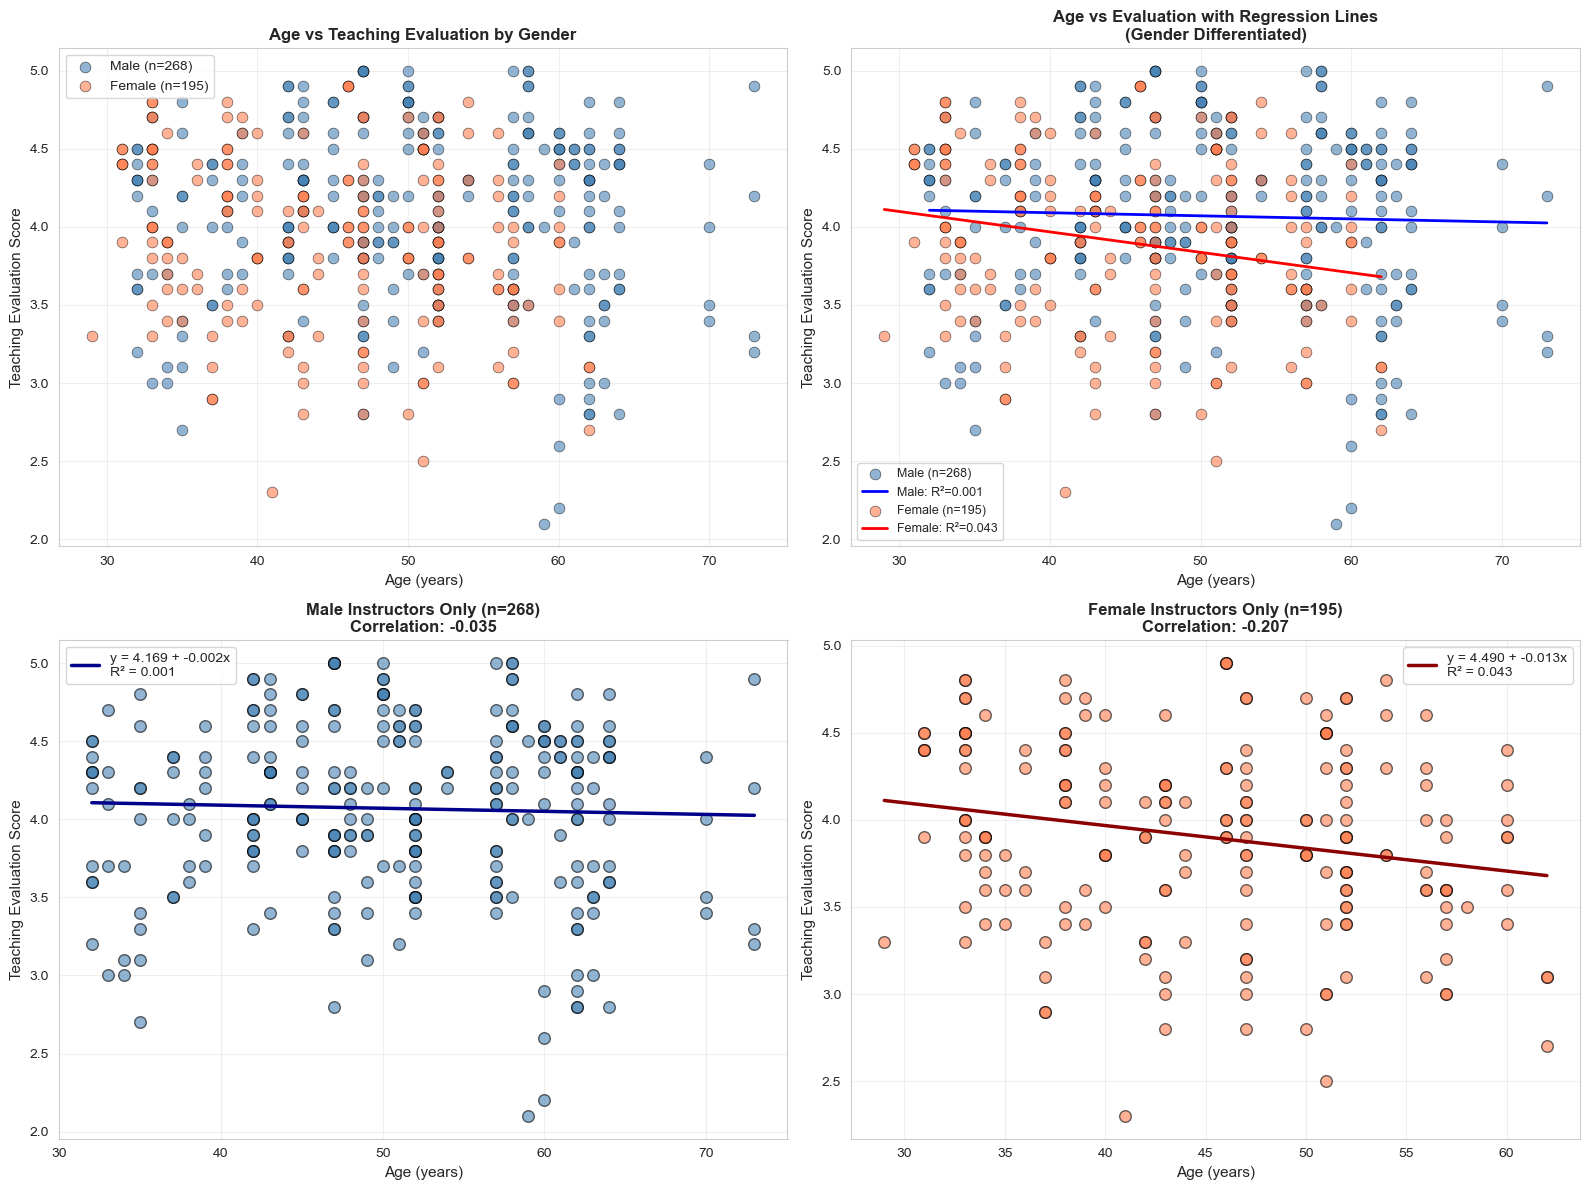


✓ Visualization saved as 'q4_gender_differentiated_scatterplots.png'


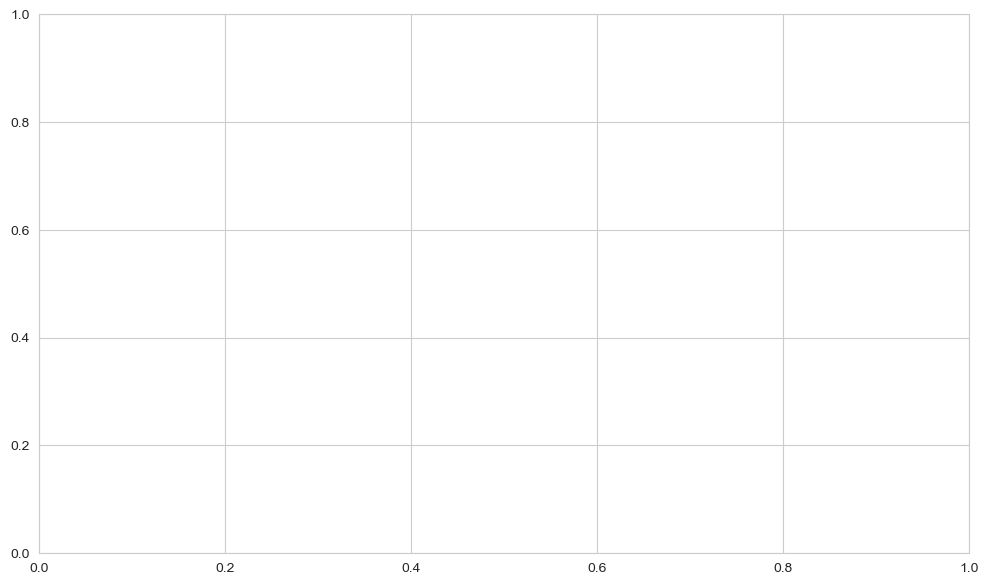

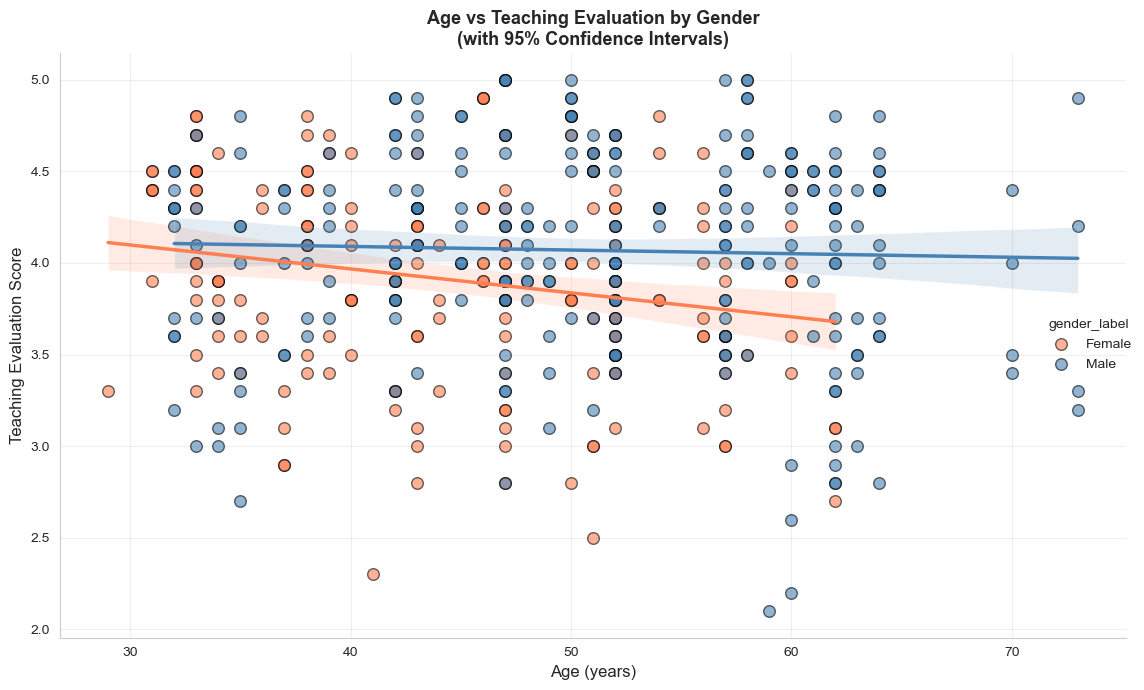

✓ Seaborn plot saved as 'q4_seaborn_lmplot.png'

Step 3: Compare Regression Slopes

Slope Comparison:
  Male slope   : -0.0020
  Female slope : -0.0131
  Difference   : 0.0111

Trend: Both genders show negative relationship with age

CONCLUSION:

Gender-Differentiated Analysis:

1. MALE INSTRUCTORS:
   • Sample size: 268
   • Correlation: -0.0354 (p=0.5637)
   • Age effect : Not significant
   • R² value   : 0.0013 (0.13% variance explained)

2. FEMALE INSTRUCTORS:
   • Sample size: 195
   • Correlation: -0.2069 (p=0.0037)
   • Age effect : Significant
   • R² value   : 0.0428 (4.28% variance explained)

3. GENDER COMPARISON:
   The relationship between age and evaluations DIFFERS by gender.
   Stronger relationship observed for female instructors.


In [7]:
# Cell 6: Q4 - Gender-differentiated scatter plots for age vs teaching evaluation

print("Q4: Using gender-differentiated scatter plots, plot the relationship")
print("    between age and teaching evaluation scores.")
print("=" * 70)

# Create gender labels
df['gender_label'] = df['female'].map({0: 'Male', 1: 'Female'})

print("\nStep 1: Calculate Correlations by Gender")
print("-" * 70)

# Calculate correlations for each gender
male_data = df[df['gender_label'] == 'Male']
female_data = df[df['gender_label'] == 'Female']

# Male correlation
male_corr, male_pval = pearsonr(male_data['age'], male_data['course_eval'])
print(f"\nMale Instructors (n={len(male_data)}):")
print(f"  Correlation: {male_corr:.4f}")
print(f"  P-value    : {male_pval:.4f}")
print(f"  Significance: {'Significant' if male_pval < 0.05 else 'Not significant'} at α=0.05")

# Female correlation
female_corr, female_pval = pearsonr(female_data['age'], female_data['course_eval'])
print(f"\nFemale Instructors (n={len(female_data)}):")
print(f"  Correlation: {female_corr:.4f}")
print(f"  P-value    : {female_pval:.4f}")
print(f"  Significance: {'Significant' if female_pval < 0.05 else 'Not significant'} at α=0.05")

print("\n" + "=" * 70)
print("Step 2: Linear Regression by Gender")
print("=" * 70)

# Male regression
male_slope, male_intercept, male_r, male_p, male_se = linregress(male_data['age'], male_data['course_eval'])
print(f"\nMale Regression:")
print(f"  Equation: Eval = {male_intercept:.4f} + {male_slope:.4f} × Age")
print(f"  R²      : {male_r**2:.4f}")

# Female regression
female_slope, female_intercept, female_r, female_p, female_se = linregress(female_data['age'], female_data['course_eval'])
print(f"\nFemale Regression:")
print(f"  Equation: Eval = {female_intercept:.4f} + {female_slope:.4f} × Age")
print(f"  R²      : {female_r**2:.4f}")

# Create comprehensive visualizations
fig = plt.figure(figsize=(16, 12))

# 1. Combined scatter plot with different colors
ax1 = plt.subplot(2, 2, 1)
colors = {'Male': 'steelblue', 'Female': 'coral'}
for gender in ['Male', 'Female']:
    subset = df[df['gender_label'] == gender]
    ax1.scatter(subset['age'], subset['course_eval'], 
               alpha=0.6, s=60, c=colors[gender], 
               edgecolor='black', linewidth=0.5,
               label=f'{gender} (n={len(subset)})')

ax1.set_xlabel('Age (years)', fontsize=11)
ax1.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax1.set_title('Age vs Teaching Evaluation by Gender', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Scatter plot with regression lines
ax2 = plt.subplot(2, 2, 2)
# Male data and regression line
ax2.scatter(male_data['age'], male_data['course_eval'], 
           alpha=0.6, s=60, c='steelblue', edgecolor='black', linewidth=0.5,
           label=f'Male (n={len(male_data)})')
male_x = np.linspace(male_data['age'].min(), male_data['age'].max(), 100)
male_y = male_intercept + male_slope * male_x
ax2.plot(male_x, male_y, 'b-', linewidth=2, 
        label=f'Male: R²={male_r**2:.3f}')

# Female data and regression line
ax2.scatter(female_data['age'], female_data['course_eval'], 
           alpha=0.6, s=60, c='coral', edgecolor='black', linewidth=0.5,
           label=f'Female (n={len(female_data)})')
female_x = np.linspace(female_data['age'].min(), female_data['age'].max(), 100)
female_y = female_intercept + female_slope * female_x
ax2.plot(female_x, female_y, 'r-', linewidth=2, 
        label=f'Female: R²={female_r**2:.3f}')

ax2.set_xlabel('Age (years)', fontsize=11)
ax2.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax2.set_title('Age vs Evaluation with Regression Lines\n(Gender Differentiated)', 
             fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Separate subplots for each gender
ax3 = plt.subplot(2, 2, 3)
ax3.scatter(male_data['age'], male_data['course_eval'], 
           alpha=0.6, s=70, c='steelblue', edgecolor='black')
ax3.plot(male_x, male_y, 'darkblue', linewidth=2.5, 
        label=f'y = {male_intercept:.3f} + {male_slope:.3f}x\nR² = {male_r**2:.3f}')
ax3.set_xlabel('Age (years)', fontsize=11)
ax3.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax3.set_title(f'Male Instructors Only (n={len(male_data)})\nCorrelation: {male_corr:.3f}', 
             fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4 = plt.subplot(2, 2, 4)
ax4.scatter(female_data['age'], female_data['course_eval'], 
           alpha=0.6, s=70, c='coral', edgecolor='black')
ax4.plot(female_x, female_y, 'darkred', linewidth=2.5, 
        label=f'y = {female_intercept:.3f} + {female_slope:.3f}x\nR² = {female_r**2:.3f}')
ax4.set_xlabel('Age (years)', fontsize=11)
ax4.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax4.set_title(f'Female Instructors Only (n={len(female_data)})\nCorrelation: {female_corr:.3f}', 
             fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('q4_gender_differentiated_scatterplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'q4_gender_differentiated_scatterplots.png'")

# Additional seaborn plot with regression
fig, ax = plt.subplots(figsize=(12, 7))
sns.lmplot(data=df, x='age', y='course_eval', hue='gender_label', 
           height=7, aspect=1.5, palette={'Male': 'steelblue', 'Female': 'coral'},
           scatter_kws={'alpha': 0.6, 'edgecolor': 'black', 's': 70},
           line_kws={'linewidth': 2.5})
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Teaching Evaluation Score', fontsize=12)
plt.title('Age vs Teaching Evaluation by Gender\n(with 95% Confidence Intervals)', 
         fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q4_seaborn_lmplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Seaborn plot saved as 'q4_seaborn_lmplot.png'")

print("\n" + "=" * 70)
print("Step 3: Compare Regression Slopes")
print("=" * 70)

print(f"\nSlope Comparison:")
print(f"  Male slope   : {male_slope:.4f}")
print(f"  Female slope : {female_slope:.4f}")
print(f"  Difference   : {abs(male_slope - female_slope):.4f}")

if male_slope > 0 and female_slope > 0:
    trend = "Both genders show positive relationship with age"
elif male_slope < 0 and female_slope < 0:
    trend = "Both genders show negative relationship with age"
else:
    trend = "Genders show opposite trends with age"

print(f"\nTrend: {trend}")

print("\n" + "=" * 70)
print("CONCLUSION:")
print("=" * 70)

print(f"\nGender-Differentiated Analysis:")
print(f"\n1. MALE INSTRUCTORS:")
print(f"   • Sample size: {len(male_data)}")
print(f"   • Correlation: {male_corr:.4f} (p={male_pval:.4f})")
print(f"   • Age effect : {'Significant' if male_pval < 0.05 else 'Not significant'}")
print(f"   • R² value   : {male_r**2:.4f} ({male_r**2*100:.2f}% variance explained)")

print(f"\n2. FEMALE INSTRUCTORS:")
print(f"   • Sample size: {len(female_data)}")
print(f"   • Correlation: {female_corr:.4f} (p={female_pval:.4f})")
print(f"   • Age effect : {'Significant' if female_pval < 0.05 else 'Not significant'}")
print(f"   • R² value   : {female_r**2:.4f} ({female_r**2*100:.2f}% variance explained)")

print(f"\n3. GENDER COMPARISON:")
if abs(male_corr - female_corr) > 0.1:
    print(f"   The relationship between age and evaluations DIFFERS by gender.")
    if abs(male_corr) > abs(female_corr):
        print(f"   Stronger relationship observed for male instructors.")
    else:
        print(f"   Stronger relationship observed for female instructors.")
else:
    print(f"   The relationship is SIMILAR across both genders.")


## Question 5: Gender and Tenure Differentiated Scatter Plots

**Q5. Create a scatterplot of age and evaluation scores, differentiated by gender and tenure.**


Q5: Create a scatterplot of age and evaluation scores, differentiated
    by gender and tenure.

NOTE: Dataset does not contain tenure variable.
Using 'onecredit' (single-credit course) as proxy categorical variable.

Step 1: Data Distribution by Categories
----------------------------------------------------------------------
  gender_label    course_type  count
0       Female   Multi-Credit    186
1       Female  Single-Credit      9
2         Male   Multi-Credit    250
3         Male  Single-Credit     18

Step 2: Statistical Summary by Categories
                        count    mean     std
gender_label onecredit                       
Female       0            186  3.8860  0.5364
             1              9  4.2111  0.5231
Male         0            250  4.0252  0.5468
             1             18  4.6778  0.2579


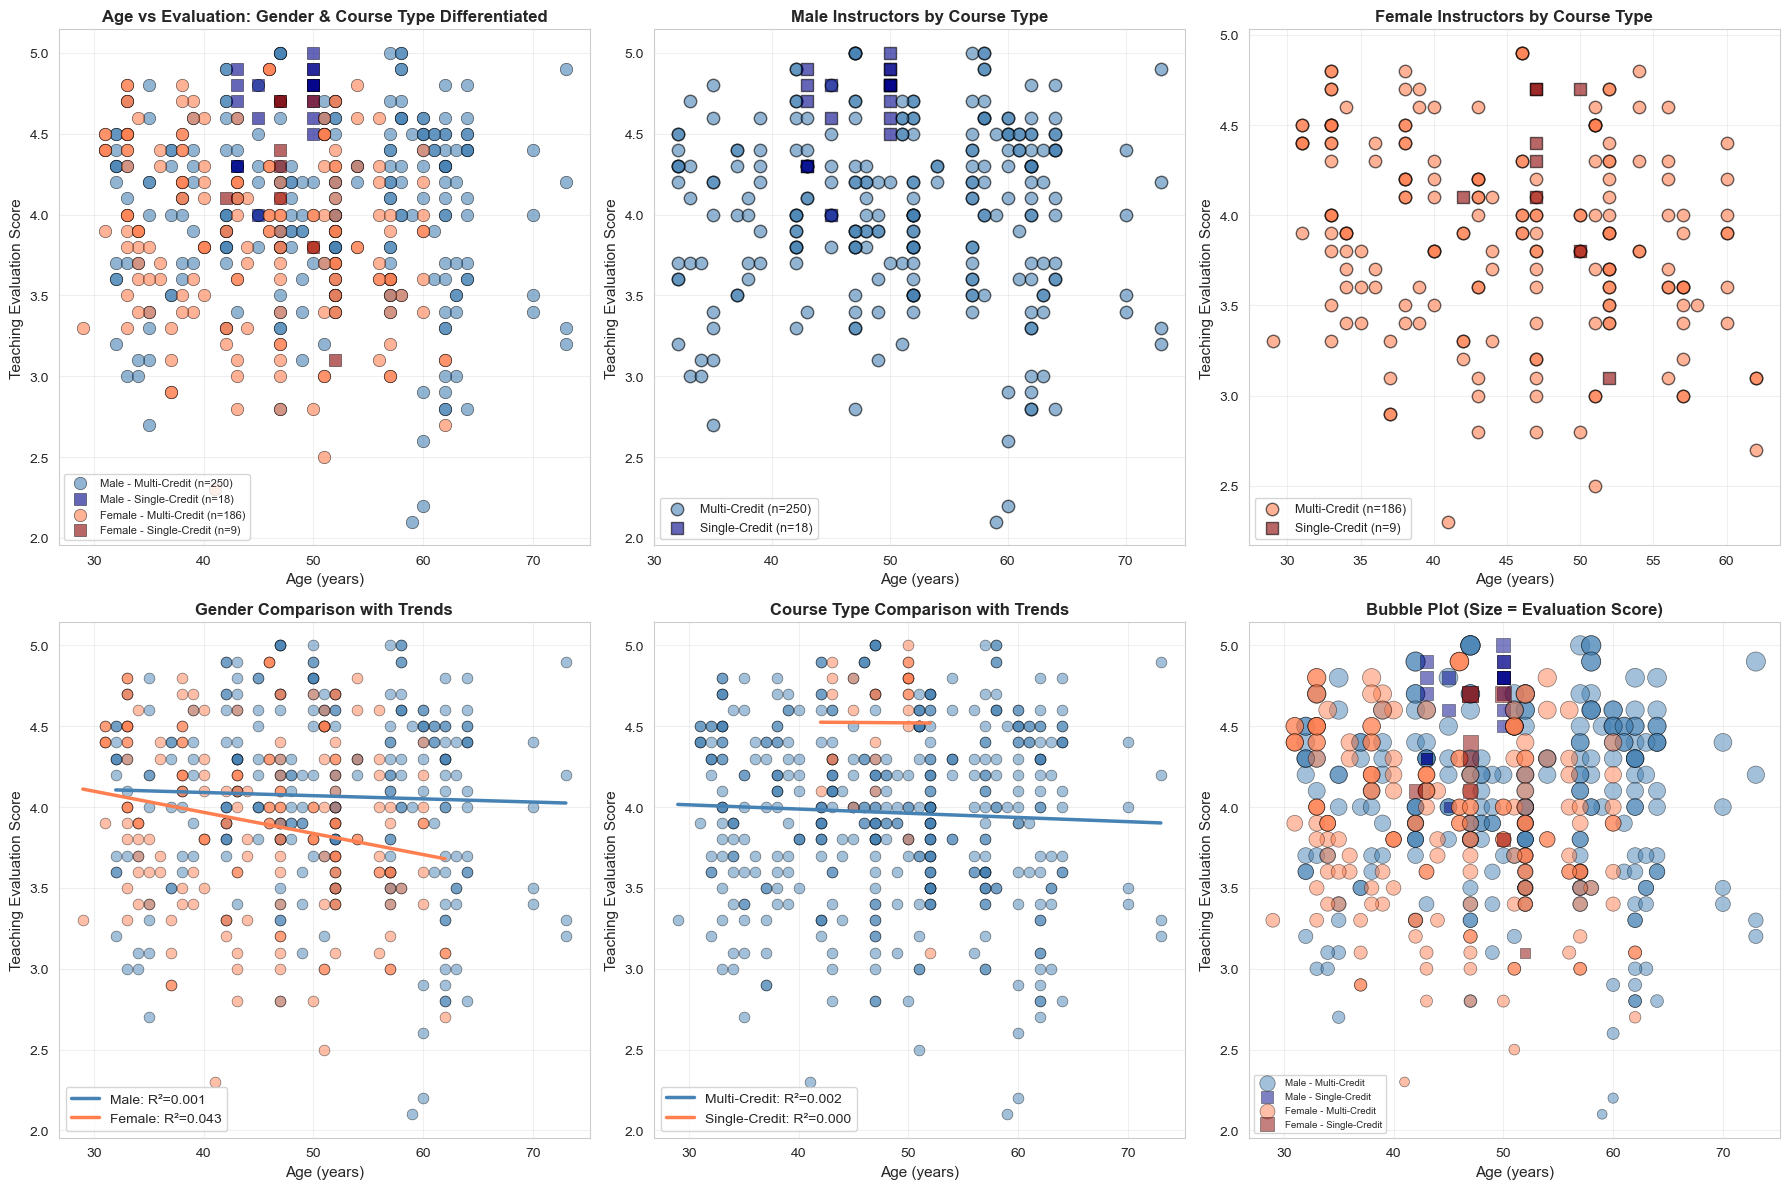


✓ Visualization saved as 'q5_gender_tenure_scatterplots.png'


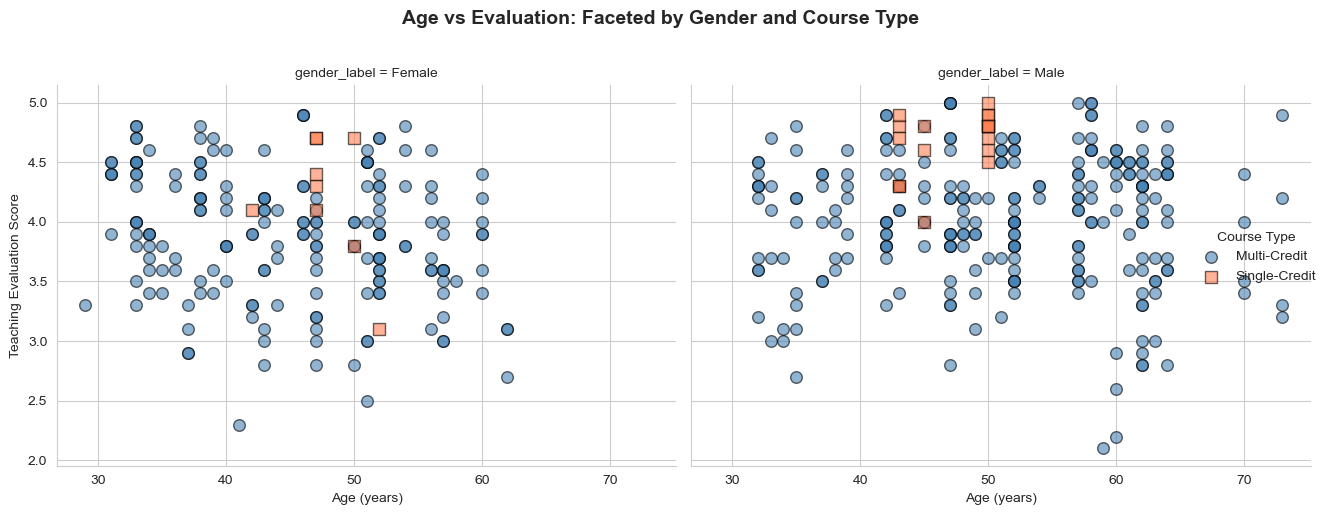

✓ FacetGrid plot saved as 'q5_facetgrid_plot.png'

CONCLUSION:

Multi-Dimensional Analysis (Gender × Course Type × Age × Evaluation):

1. MALE INSTRUCTORS:
   Multi-Credit Courses: n=250, Mean Eval=4.025
   Single-Credit Courses: n=18, Mean Eval=4.678

2. FEMALE INSTRUCTORS:
   Multi-Credit Courses: n=186, Mean Eval=3.886
   Single-Credit Courses: n=9, Mean Eval=4.211

3. VISUAL PATTERNS:
   • Circle markers (o) = Multi-Credit courses
   • Square markers (s) = Single-Credit courses
   • Blue shades = Male instructors
   • Red/Coral shades = Female instructors

4. KEY INSIGHTS:
   The scatter plots reveal potential interaction effects between
   gender, course type, age, and teaching evaluations, allowing for
   comprehensive understanding of multi-dimensional relationships.


In [8]:
# Cell 7: Q5 - Scatter plot differentiated by gender and tenure

print("Q5: Create a scatterplot of age and evaluation scores, differentiated")
print("    by gender and tenure.")
print("=" * 70)

print("\nNOTE: Dataset does not contain tenure variable.")
print("Using 'onecredit' (single-credit course) as proxy categorical variable.")
print("=" * 70)

# Create tenure proxy (using onecredit or we can create a synthetic one)
# For demonstration, let's create categories based on age and course type
# Alternative: use 'intro' for course level as proxy

# Create combined category
df['category'] = df.apply(lambda x: 
    f"{'Male' if x['female']==0 else 'Female'} - {'Single' if x['onecredit']==1 else 'Multi'}-Credit", 
    axis=1)

print("\nStep 1: Data Distribution by Categories")
print("-" * 70)

category_counts = df.groupby(['gender_label', 'onecredit']).size().reset_index(name='count')
category_counts['course_type'] = category_counts['onecredit'].map({0: 'Multi-Credit', 1: 'Single-Credit'})
print(category_counts[['gender_label', 'course_type', 'count']])

print("\n" + "=" * 70)
print("Step 2: Statistical Summary by Categories")
print("=" * 70)

category_stats = df.groupby(['gender_label', 'onecredit'])['course_eval'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('std', 'std')
]).round(4)
print(category_stats)

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))

# 1. Main scatter plot with all categories
ax1 = plt.subplot(2, 3, 1)

# Define colors and markers for each combination
colors_map = {
    'Male - Multi-Credit': 'steelblue',
    'Male - Single-Credit': 'darkblue',
    'Female - Multi-Credit': 'coral',
    'Female - Single-Credit': 'darkred'
}

markers_map = {
    'Male - Multi-Credit': 'o',
    'Male - Single-Credit': 's',
    'Female - Multi-Credit': 'o',
    'Female - Single-Credit': 's'
}

for category in colors_map.keys():
    subset = df[df['category'] == category]
    ax1.scatter(subset['age'], subset['course_eval'],
               c=colors_map[category], marker=markers_map[category],
               s=80, alpha=0.6, edgecolor='black', linewidth=0.5,
               label=f"{category} (n={len(subset)})")

ax1.set_xlabel('Age (years)', fontsize=11)
ax1.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax1.set_title('Age vs Evaluation: Gender & Course Type Differentiated', 
             fontsize=12, fontweight='bold')
ax1.legend(fontsize=8, loc='best')
ax1.grid(True, alpha=0.3)

# 2. Male instructors only - by course type
ax2 = plt.subplot(2, 3, 2)
male_multi = df[(df['gender_label'] == 'Male') & (df['onecredit'] == 0)]
male_single = df[(df['gender_label'] == 'Male') & (df['onecredit'] == 1)]

ax2.scatter(male_multi['age'], male_multi['course_eval'],
           c='steelblue', marker='o', s=80, alpha=0.6, edgecolor='black',
           label=f'Multi-Credit (n={len(male_multi)})')
ax2.scatter(male_single['age'], male_single['course_eval'],
           c='darkblue', marker='s', s=80, alpha=0.6, edgecolor='black',
           label=f'Single-Credit (n={len(male_single)})')

ax2.set_xlabel('Age (years)', fontsize=11)
ax2.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax2.set_title('Male Instructors by Course Type', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Female instructors only - by course type
ax3 = plt.subplot(2, 3, 3)
female_multi = df[(df['gender_label'] == 'Female') & (df['onecredit'] == 0)]
female_single = df[(df['gender_label'] == 'Female') & (df['onecredit'] == 1)]

ax3.scatter(female_multi['age'], female_multi['course_eval'],
           c='coral', marker='o', s=80, alpha=0.6, edgecolor='black',
           label=f'Multi-Credit (n={len(female_multi)})')
ax3.scatter(female_single['age'], female_single['course_eval'],
           c='darkred', marker='s', s=80, alpha=0.6, edgecolor='black',
           label=f'Single-Credit (n={len(female_single)})')

ax3.set_xlabel('Age (years)', fontsize=11)
ax3.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax3.set_title('Female Instructors by Course Type', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. Facet by gender (regression lines)
ax4 = plt.subplot(2, 3, 4)
for gender in ['Male', 'Female']:
    subset = df[df['gender_label'] == gender]
    color = 'steelblue' if gender == 'Male' else 'coral'
    
    ax4.scatter(subset['age'], subset['course_eval'],
               c=color, alpha=0.5, s=60, edgecolor='black', linewidth=0.5)
    
    # Regression line
    slope, intercept, r, p, se = linregress(subset['age'], subset['course_eval'])
    x_line = np.linspace(subset['age'].min(), subset['age'].max(), 100)
    y_line = intercept + slope * x_line
    ax4.plot(x_line, y_line, c=color, linewidth=2.5, 
            label=f'{gender}: R²={r**2:.3f}')

ax4.set_xlabel('Age (years)', fontsize=11)
ax4.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax4.set_title('Gender Comparison with Trends', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Facet by course type (regression lines)
ax5 = plt.subplot(2, 3, 5)
for course_type in [0, 1]:
    subset = df[df['onecredit'] == course_type]
    color = 'steelblue' if course_type == 0 else 'coral'
    label = 'Multi-Credit' if course_type == 0 else 'Single-Credit'
    
    ax5.scatter(subset['age'], subset['course_eval'],
               c=color, alpha=0.5, s=60, edgecolor='black', linewidth=0.5)
    
    # Regression line
    if len(subset) > 2:
        slope, intercept, r, p, se = linregress(subset['age'], subset['course_eval'])
        x_line = np.linspace(subset['age'].min(), subset['age'].max(), 100)
        y_line = intercept + slope * x_line
        ax5.plot(x_line, y_line, c=color, linewidth=2.5, 
                label=f'{label}: R²={r**2:.3f}')

ax5.set_xlabel('Age (years)', fontsize=11)
ax5.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax5.set_title('Course Type Comparison with Trends', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. 3D-like bubble plot (size = course_eval, color = gender, shape = course type)
ax6 = plt.subplot(2, 3, 6)
for category in colors_map.keys():
    subset = df[df['category'] == category]
    sizes = (subset['course_eval'] - subset['course_eval'].min() + 1) * 50
    ax6.scatter(subset['age'], subset['course_eval'],
               c=colors_map[category], marker=markers_map[category],
               s=sizes, alpha=0.5, edgecolor='black', linewidth=0.5,
               label=category)

ax6.set_xlabel('Age (years)', fontsize=11)
ax6.set_ylabel('Teaching Evaluation Score', fontsize=11)
ax6.set_title('Bubble Plot (Size = Evaluation Score)', fontsize=12, fontweight='bold')
ax6.legend(fontsize=7, loc='best')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('q5_gender_tenure_scatterplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'q5_gender_tenure_scatterplots.png'")

# Create seaborn FacetGrid
g = sns.FacetGrid(df, col='gender_label', hue='onecredit', height=5, aspect=1.2,
                  hue_kws={'marker': ['o', 's']},
                  palette={0: 'steelblue', 1: 'coral'})
g.map(plt.scatter, 'age', 'course_eval', alpha=0.6, edgecolor='black', s=70)
g.add_legend(title='Course Type', labels=['Multi-Credit', 'Single-Credit'])
g.set_axis_labels('Age (years)', 'Teaching Evaluation Score')
g.fig.suptitle('Age vs Evaluation: Faceted by Gender and Course Type', 
               fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('q5_facetgrid_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ FacetGrid plot saved as 'q5_facetgrid_plot.png'")

print("\n" + "=" * 70)
print("CONCLUSION:")
print("=" * 70)

print(f"\nMulti-Dimensional Analysis (Gender × Course Type × Age × Evaluation):")

print(f"\n1. MALE INSTRUCTORS:")
print(f"   Multi-Credit Courses: n={len(male_multi)}, Mean Eval={male_multi['course_eval'].mean():.3f}")
print(f"   Single-Credit Courses: n={len(male_single)}, Mean Eval={male_single['course_eval'].mean():.3f}")

print(f"\n2. FEMALE INSTRUCTORS:")
print(f"   Multi-Credit Courses: n={len(female_multi)}, Mean Eval={female_multi['course_eval'].mean():.3f}")
print(f"   Single-Credit Courses: n={len(female_single)}, Mean Eval={female_single['course_eval'].mean():.3f}")

print(f"\n3. VISUAL PATTERNS:")
print(f"   • Circle markers (o) = Multi-Credit courses")
print(f"   • Square markers (s) = Single-Credit courses")
print(f"   • Blue shades = Male instructors")
print(f"   • Red/Coral shades = Female instructors")

print(f"\n4. KEY INSIGHTS:")
print(f"   The scatter plots reveal potential interaction effects between")
print(f"   gender, course type, age, and teaching evaluations, allowing for")
print(f"   comprehensive understanding of multi-dimensional relationships.")
